# Sales Prediction for Big Mart Outlets

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

 # Let's Start !

In [1]:
#Importing the basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

For integrity purpose , we wont take a look at the testing dataset . We will be dealing with the testing dataset , once we are absolutely done, with our training dataset

In [2]:
#Reading the training and testing dataset

df = pd.read_csv('train_bigmart.csv')
df_test = pd.read_csv('test_bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#To check the descriptive statistics of our dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
#Now we will extract the categorical features from our dataset
cat_features = [index for index in df.columns if len(df[index].unique())<25]
cat_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

To know how many unique values are there in each categorical feature i will define a function named counts that will return the value counts of differnt unique values of each categorical feature 

In [5]:
def counts (feature):
    return df[feature].value_counts()
counts('Outlet_Type')

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

we can see that  that there is mistake in collection the data for  Item_Fat_Content .

For Low Fat they have used three symbols which are Low Fat, LF an low fat so we will replace that values by original values that areLow fat and regular

In [6]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

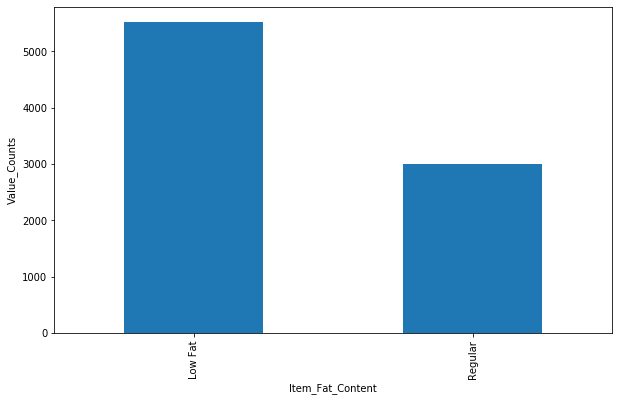

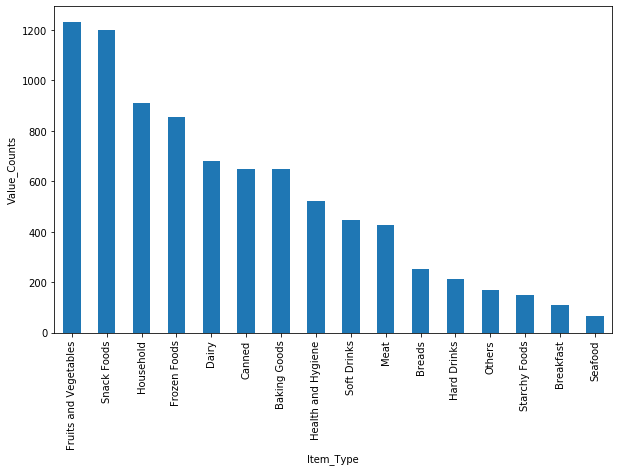

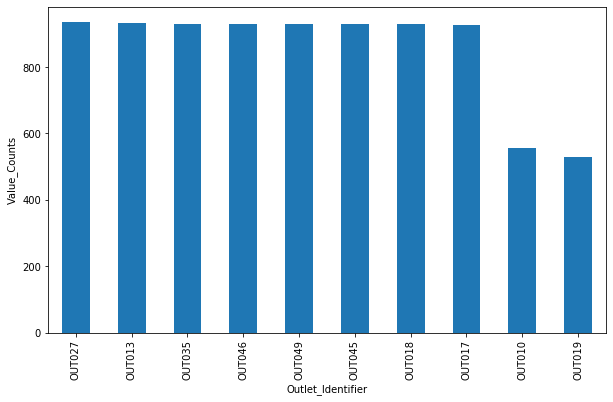

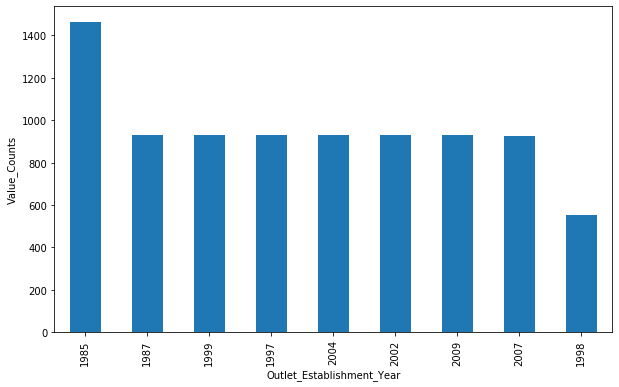

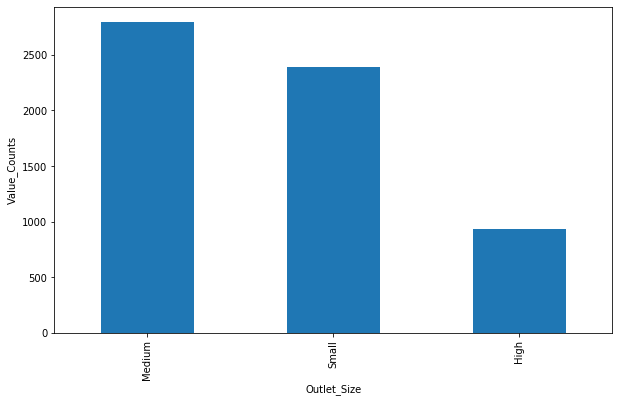

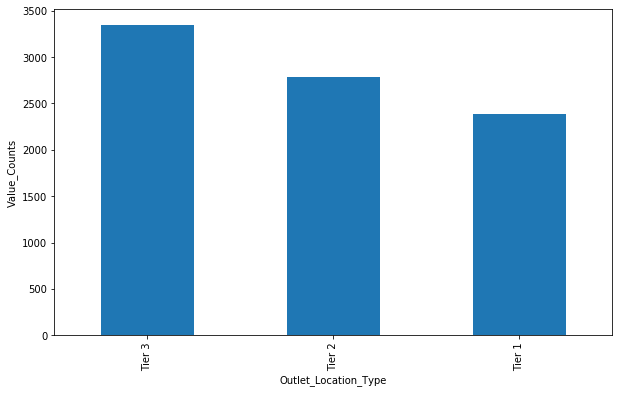

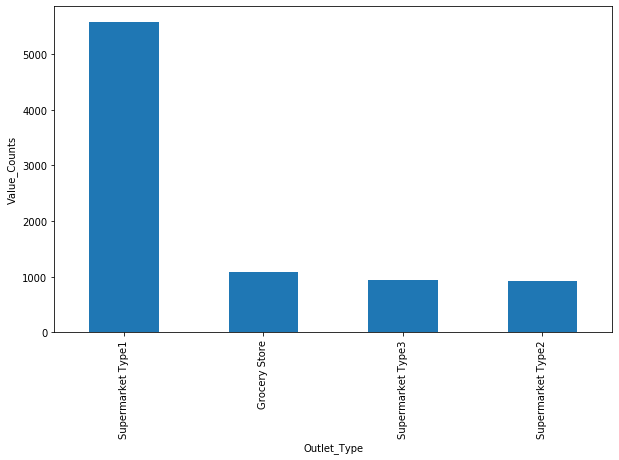

In [7]:
#For better understanding and visualisation purpose i will now create the countplot for all the categorical features
for i in cat_features:
    plt.figure(figsize=(10,6))
    df[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Value_Counts')
    plt.show()

# Filling the missing values

In [8]:
#As there is no zero visibility of any item in any kind of shopping centre

df['Item_Visibility'].replace(0,np.nan,inplace=True)

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Outlet_Size'].fillna('Unknown',inplace=True)

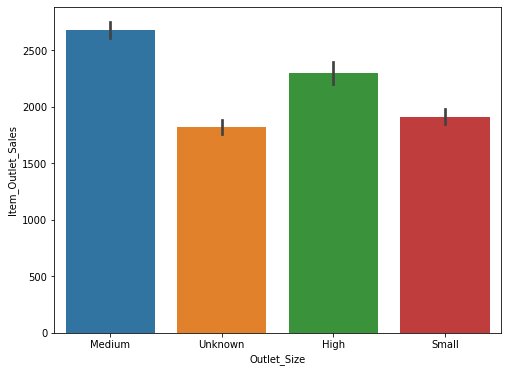

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(df['Outlet_Size'],df['Item_Outlet_Sales'])
plt.show()

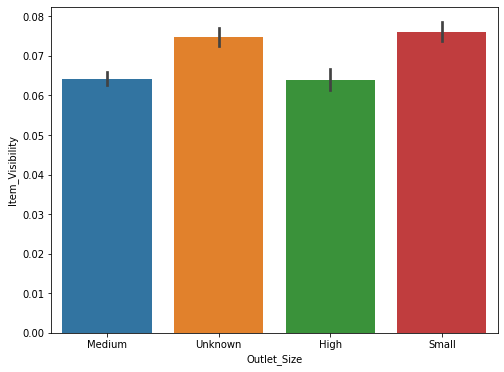

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(df['Outlet_Size'],df['Item_Visibility'])
plt.show()

From above two graph we can conclude as follows:

Graph 1 : Generally there is low outlet sales in stores having outlet size small and unknown . Also store having small outlet size resembles the store having unknown outlet size

Graph 1 : Generally there is high visibility in stores having outlet size small and unknown . Also store having small outlet size resembles the store having unknown outlet size

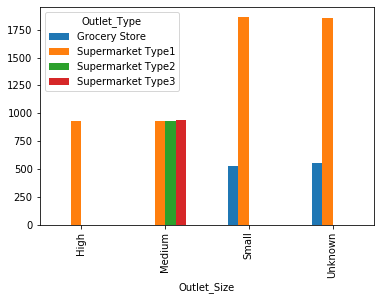

In [13]:
a=pd.crosstab(df['Outlet_Size'],df['Outlet_Type'])
a.plot(kind='bar')
plt.show()

Above graph also tells us that outlet having small size resembles the outlet having unknown size.Also outlet having smaller size are supermaket type 1 or grocery store

In [14]:
df1=df[df['Outlet_Size'] == 'Unknown']
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Unknown,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Unknown,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,Unknown,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Unknown,Tier 3,Grocery Store,178.4344


This dataframe also supports the previous reason that outlet having unknown size are of type grocery store or supermarket type 1

So i'll fill the missing values of outlet size by small as there are enough evidence

In [15]:
df['Outlet_Size'].replace('Unknown','Small',inplace=True)

In [16]:
df0=df[df['Item_Identifier'] == 'FDU28']
df0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350
6362,FDU28,NaN,Regular,0.164439,Frozen Foods,188.4214,OUT019,1985,Small,Tier 1,Grocery Store,376.8428
6419,FDU28,19.2,Regular,0.094301,Frozen Foods,187.5214,OUT018,2009,Medium,Tier 3,Supermarket Type2,1695.7926
7597,FDU28,NaN,Regular,0.093464,Frozen Foods,189.1214,OUT027,1985,Medium,Tier 3,Supermarket Type3,2261.0568
8419,FDU28,19.2,Regular,0.093918,Frozen Foods,189.8214,OUT046,1997,Small,Tier 1,Supermarket Type1,942.1070


If you look the above dataframe for particular identifier,values for item visibility are same for outlet of type supermarket and for grocery store the value is old value + 0.1

In [17]:
df['Outlet_Type1'] = df['Outlet_Type']

In [18]:
#converting supermarket type 1 ,2,3 to supermarket
dict={'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket','Supermarket Type3':'Supermarket','Grocery Store':'Grocery Store'}
df['Outlet_Type1'] = df['Outlet_Type1'].map(dict)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Type1                    0
dtype: int64

In [19]:
#Filling the missing value wrt item identifier and outlet type
df['Item_Visibility'].fillna(df.groupby(['Item_Identifier','Outlet_Type1'])['Item_Visibility'].transform('mean'),inplace=True)

In [20]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                38
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Type1                    0
dtype: int64

After filling the missing value wrt item identifier and outlet type there are several values which are still nan because if for particular identifier if there is only one type of outlet type which is nan we cannot take mean of it and fill that value

In [21]:
df7=df[df['Item_Visibility'].isnull()]
df7.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store
175,FDR47,17.85,Low Fat,NaN,Breads,196.5794,OUT010,1998,Small,Tier 3,Grocery Store,585.2382,Grocery Store
216,FDR44,6.11,Regular,NaN,Fruits and Vegetables,131.2968,OUT010,1998,Small,Tier 3,Grocery Store,260.9936,Grocery Store
411,NCZ42,10.50,Low Fat,NaN,Household,238.3248,OUT010,1998,Small,Tier 3,Grocery Store,711.0744,Grocery Store
545,FDB38,NaN,Regular,NaN,Canned,160.6920,OUT019,1985,Small,Tier 1,Grocery Store,319.5840,Grocery Store


All missing value corresponds to outlet of type grocery store.

As we have observed that item visibility for grocery store is plus 0.1 the value for supermarket for particular item identifier

In [22]:
df['Item_Visibility'] = (df.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()+0.1)))

After filling the missing values for item identifier.

Now I'll try to fill the missing values present in Item_Weight column

To fill the missing values i'll the dependance of item weight with various categorical features

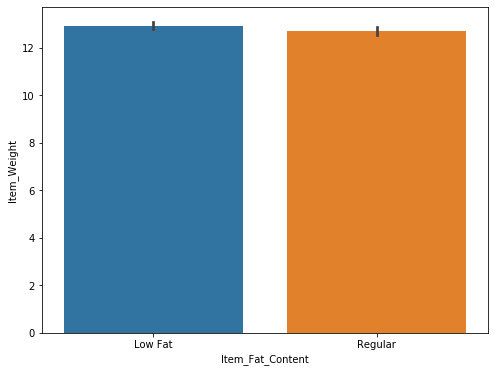

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(df["Item_Fat_Content"],df['Item_Weight'])
plt.show()

Generaaly Low Fat product have higher item weight compared to regular product.

But if you look the at above graph the difference is very small to generalize our point

In [24]:
df2=df[df['Item_Identifier'] == 'FDA15']
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Small,Tier 2,Supermarket Type1,5976.2208,Supermarket
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,Supermarket
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,Supermarket
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Small,Tier 3,Grocery Store,498.0184,Grocery Store


In [25]:
df3=df[df['Item_Identifier'] == 'FDA08']
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
192,FDA08,11.85,Regular,0.050187,Fruits and Vegetables,164.1526,OUT045,2002,Small,Tier 2,Supermarket Type1,3124.5994,Supermarket
3355,FDA08,11.85,Regular,0.050085,Fruits and Vegetables,164.7526,OUT046,1997,Small,Tier 1,Supermarket Type1,1315.6208,Supermarket
3619,FDA08,11.85,Regular,0.050368,Fruits and Vegetables,163.8526,OUT017,2007,Small,Tier 2,Supermarket Type1,1808.9786,Supermarket
7220,FDA08,NaN,Regular,0.049843,Fruits and Vegetables,164.2526,OUT027,1985,Medium,Tier 3,Supermarket Type3,3946.8624,Supermarket
7707,FDA08,NaN,Regular,0.087693,Fruits and Vegetables,162.5526,OUT019,1985,Small,Tier 1,Grocery Store,328.9052,Grocery Store


If you look at the above two dataframe you can clearly say that item identifier is strongly correlated with item weight so i will fill the missing value of item weight wrt item identifier

In [26]:
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('median'),inplace=True)

In [27]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Type1                 0
dtype: int64

In [28]:
df4=df[df['Item_Weight'].isnull()]
df4

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,Supermarket
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,Supermarket
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,Supermarket
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,Grocery Store


After filling missing values wrt item identifier there are 4 unique identifiers present so we need to still fill this remaining 4 values.

So i will fill this missing values wrt item type

In [29]:
df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

# Removing the skewness

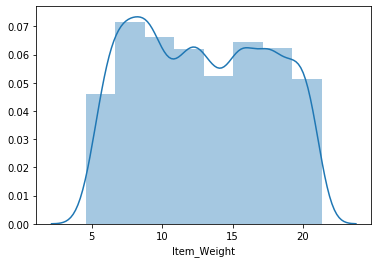

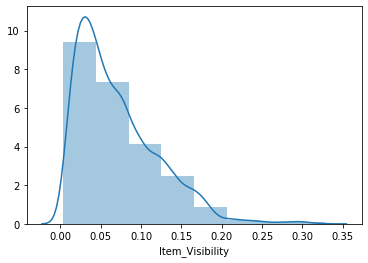

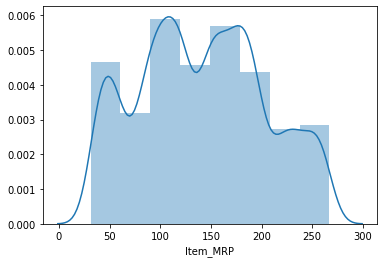

In [30]:
num_features = ['Item_Weight','Item_Visibility','Item_MRP']
for i in num_features:
    sns.distplot(df[i],bins=8)
    plt.xlabel(i)
    plt.show()

From above graphs, graph 2 is positively skewed so i will remove the skewness by performing log transformation

In [31]:

df['log_visibility'] = np.log(df['Item_Visibility'])

# Boxplots

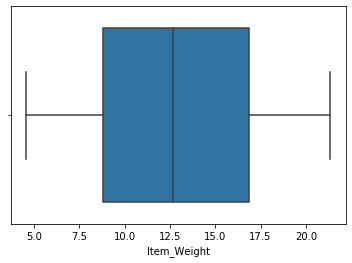

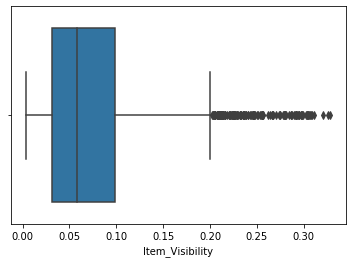

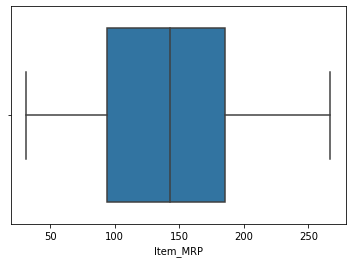

In [32]:
for i in num_features:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

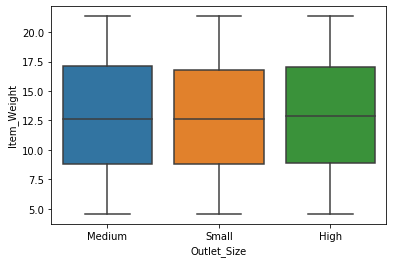

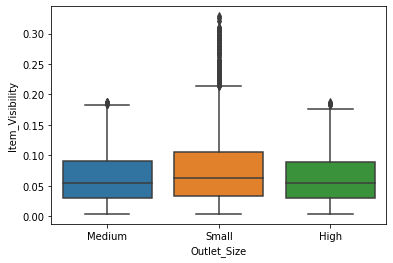

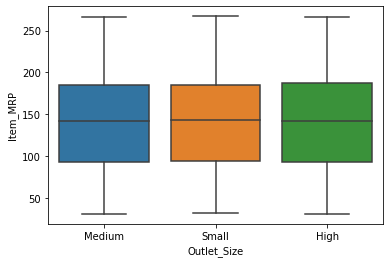

In [33]:
def plot_graph(x_axis_feature,type_of_graph,hue=None):
    for i in num_features:
        if (type_of_graph=='boxplot'):
            sns.boxplot(x_axis_feature,i,hue=hue,data=df)
            plt.show()
        elif (type_of_graph=='barplot'):
             sns.barplot(x_axis_feature,i,data=df)
             plt.show()
        elif (type_of_graph=='catplot'):
             sns.barplot(x_axis_feature,i,hue=hue,data=df)
             plt.show()
plot_graph('Outlet_Size','boxplot')

As there are outliers present in item visibility and item outlet sales i will try to remove the outliers with the help of z score.

# Removing the Outliers

In [34]:
# Method 1 - Removing outliers with the help of z score

def remove_outlier(column):
    std = np.std(df[column])
    mean = np.mean(df[column])
    outlier = []
    for i in df[column]:
        zscore = (i - mean) / std
        
        #Considering z>3 because z>3 sinifies 99.7%values fall in that region
        
        if(zscore > 3):
            outlier.append(i)
            minimum = np.min(outlier)
    return minimum

In [35]:
print(remove_outlier('Item_Visibility'))


0.223440258


So all the values above 0.22 will be consiered as an outlier using z score

In [36]:
# Method - 2 Removing the outlier with the help of IQR score

q3 = df['Item_Visibility'].quantile(0.85)
q1 = df['Item_Visibility'].quantile(0.15)

#IQR Score


IQR = q3 - q1

print(q3 + 1.5 * IQR)

0.2799065748499999


Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

So all the values above 0.20 will be considered as an outlier using IQR score

In [37]:
# Method 3 - Using Standard Deviation
m = (df['Item_Visibility'].mean())
s = (df['Item_Visibility'].std())
print(m+(3*s))

0.22212571858415525


If data distribution is approx normal then about 68% values lie within one standard deviation of mean and about 95% lie within two standard deviation and about 99.7% values lie within three standard deviation.

Therefore, if you have any data point that is more than 3 times standard deviation then those points are likely to be considered as outlier.

So all the values above 0.22217 will be considered as an outlier using SD method

In [38]:
a = df[(df['Outlet_Type'] == 'Grocery Store')]
c = a['Item_Visibility'].median()
c

0.101231721

Actually all the outliers present in item visibility column corresponds to outltet of type grocery store so we will replace the outliers values by the median of item visibility which corresponds to outlet type grocery store

### Now we will replace those values which are considered as an outliers using zscore

In [39]:
df['Item_Visibility']=df['Item_Visibility'].where(df['Item_Visibility']<=0.2799065748499999,0.101231721)

# Feature Engineering

In [40]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,log_visibility
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,0.070105,140.992782,1997.831867,2181.288914,-2.920409
std,4.645016,0.048407,62.275067,8.371760,1706.499616,0.788455
min,4.555000,0.003575,31.290000,1985.000000,33.290000,-5.633875
25%,8.785000,0.031509,93.826500,1987.000000,834.247400,-3.457491
50%,12.650000,0.058182,143.012800,1999.000000,1794.331000,-2.844186
75%,16.850000,0.099119,185.643700,2004.000000,3101.296400,-2.311435
max,21.350000,0.279887,266.888400,2009.000000,13086.964800,-1.113550


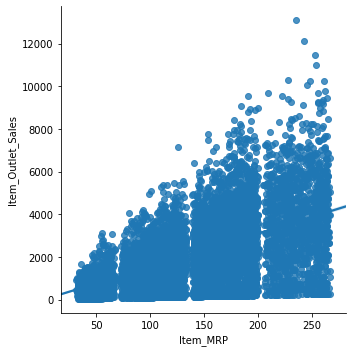

In [41]:
sns.lmplot('Item_MRP','Item_Outlet_Sales',data=df)
plt.show()

In [42]:
# I will bin Item_MRP and Item_Weight into 3 categories using descriptive statistics
df['MRP_bin']=pd.cut(df['Item_MRP'],bins=[31,93.8265,143.0128,185.6437,267],labels=['cheap','affordable','slightly expensive','expensive'])
df['Weight_bin']=pd.cut(df['Item_Weight'],bins=[4,8.785,12.65,16.85,22],labels=['vlight','light','moderate','heavy'])


I will not bin the item visibility column as it is positively skewed

In [43]:
#Extracting first two letters of Item_Identifier
df['Item_Identifier_temp']=df['Item_Identifier'].str[:2]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC


FD - Foods

DR - Drinks

NC - Non Consumable

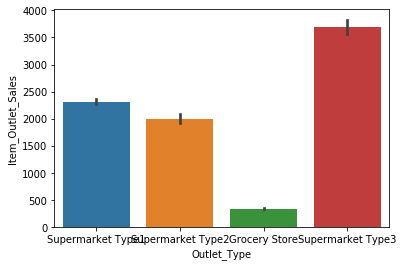

In [44]:
sns.barplot(df['Outlet_Type'],df['Item_Outlet_Sales'])
plt.show()

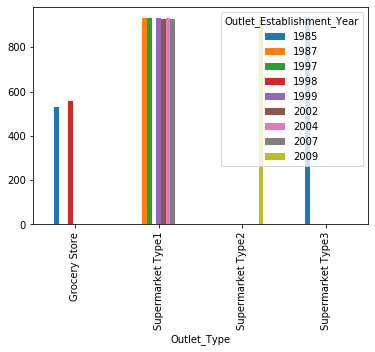

In [45]:
a=pd.crosstab(df['Outlet_Type'],df['Outlet_Establishment_Year'])
a.plot(kind='bar')
plt.show()

Since  more no of supermarket type 3 are built in 1987 than grocery store is also one of the reason why supermarket type 3 has higher sales.

Another reason is why would people go to grocery store if they get all their desired product at one stop and even at a cheaper rate

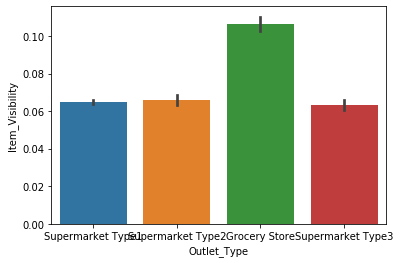

In [46]:
sns.barplot(df['Outlet_Type'],df['Item_Visibility'])
plt.show()

Visibility of all products are same in supermarket of type 1 , 2 , 3 since most of the supermarket have same intetior or the other reason might be that all the supermarket are same and are just the different branches

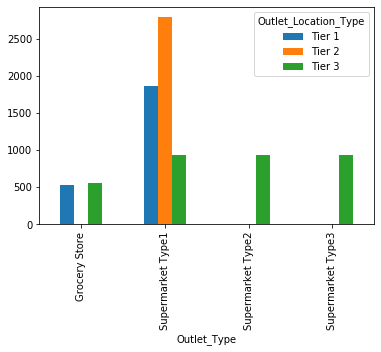

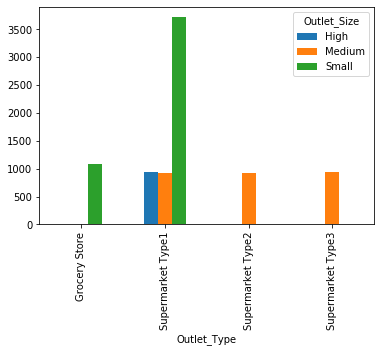

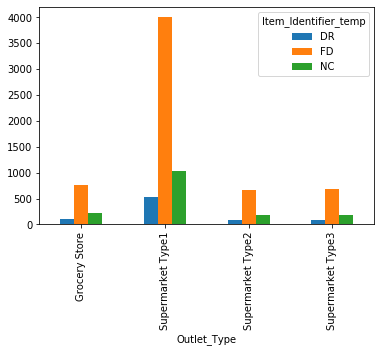

In [47]:
merge=['Outlet_Location_Type','Outlet_Size','Item_Identifier_temp']
for i in merge:
    a=pd.crosstab(df['Outlet_Type'],df[i])
    a.plot(kind='bar')
    plt.show()


All of the graph proves that the behaviour of supermarket type 2 and 3 are similar so we will add those types

In [48]:
dict={'Supermarket Type1':'Supermarket Type1','Supermarket Type2':'Supermarket Type2','Supermarket Type3':'Supermarket Type2','Grocery Store':'Grocery Store'}
df['Outlet_Type']=df['Outlet_Type'].map(dict)

In [49]:
df['Outlet_Existence']=[2020-i for i in df['Outlet_Establishment_Year']]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,21
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,22
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC,33


Outlet Existence shows how old that outlet is.

In [50]:
df['Outlet_Status']=[0 if i<=2000 else 1 for i in df['Outlet_Establishment_Year']]
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Supermarket,-4.132215,expensive,light,FD,21,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Supermarket,-3.948780,cheap,vlight,DR,11,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,21,0
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,22,0
4,NCD19,8.93,Low Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Supermarket,-4.326277,cheap,light,NC,33,0


Classifying outlet into 2 categories 0(old) and 1(new) according to the year in which the store was built

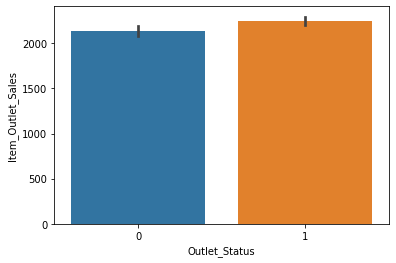

In [51]:
sns.barplot(df['Outlet_Status'],df['Item_Outlet_Sales'])
plt.show()

Above graph shows that newer outlet have higher outlet sales

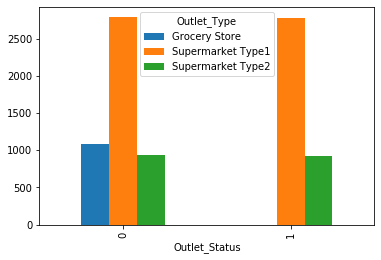

In [52]:
a=pd.crosstab(df['Outlet_Status'],df['Outlet_Type'])
a.plot(kind='bar')
plt.show()

Reason for the higher sales of newly built outlets are that newly built outlet are only of type supermarket and none of are grocery store

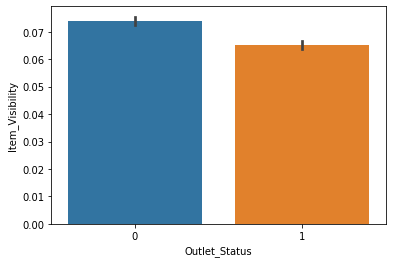

In [53]:
sns.barplot(df['Outlet_Status'],df['Item_Visibility'])
plt.show()

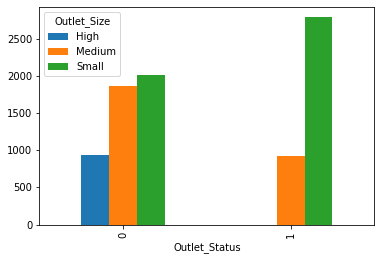

In [54]:
a=pd.crosstab(df['Outlet_Status'],df['Outlet_Size'])
a.plot(kind='bar')
plt.show()

Generally newer outlet have low item visibility since most of the newer outlets are small in size

In [55]:
# Since Non Consumables cannot be low fat or regular so  will create new var in item fat content for non consumable item identifier
df.loc[df['Item_Identifier_temp']=='NC','Item_Fat_Content']='No Fat'
df['Item_Fat_Content'].value_counts()

Low Fat    3918
Regular    3006
No Fat     1599
Name: Item_Fat_Content, dtype: int64

In [56]:
for i in df['Item_Type'].unique():
    for j in df['Item_Type'].unique():
        if(i!=j):
            print(i,j,df.loc[((df['Item_Type']==i) | (df['Item_Type']==j))]['Item_Outlet_Sales'].mean())

Dairy Soft Drinks 2143.293498846496
Dairy Meat 2204.299605420055
Dairy Fruits and Vegetables 2268.8891682340663
Dairy Household 2247.542565577891
Dairy Baking Goods 2096.330370977443
Dairy Snack Foods 2261.094653666313
Dairy Frozen Foods 2177.0668659297794
Dairy Breakfast 2215.773993434343
Dairy Health and Hygiene 2136.2680440931804
Dairy Hard Drinks 2210.253882142857
Dairy Canned 2228.9598375657406
Dairy Breads 2224.8995069667744
Dairy Starchy Foods 2257.8256645783144
Dairy Others 2171.6940784958874
Dairy Seafood 2240.566046380697
Soft Drinks Dairy 2143.293498846496
Soft Drinks Meat 2080.992337931036
Soft Drinks Fruits and Vegetables 2214.047429218844
Soft Drinks Household 2175.934638523986
Soft Drinks Baking Goods 1974.7695006404408
Soft Drinks Snack Foods 2204.0631057750766
Soft Drinks Frozen Foods 2089.648355572636
Soft Drinks Breakfast 2027.3813938738733
Soft Drinks Health and Hygiene 2008.3915645595898
Soft Drinks Hard Drinks 2049.6072066767833
Soft Drinks Canned 2136.24242650822

I've written this lines of code to show that which two items make the best combination in terms of higer outlet sales.

This code can be later modified to make combination of n items

In [57]:
#To check which item type are classified under DR , NC , FD
a=df.groupby('Item_Identifier_temp')['Item_Type'].value_counts()
a.head(60)

Item_Identifier_temp  Item_Type            
DR                    Soft Drinks               445
                      Hard Drinks               214
                      Dairy                     140
FD                    Fruits and Vegetables    1232
                      Snack Foods              1200
                      Frozen Foods              856
                      Canned                    649
                      Baking Goods              648
                      Dairy                     542
                      Meat                      425
                      Breads                    251
                      Starchy Foods             148
                      Breakfast                 110
                      Seafood                    64
NC                    Household                 910
                      Health and Hygiene        520
                      Others                    169
Name: Item_Type, dtype: int64

In [58]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [59]:
# Craeted a new column named calorie count which will show the calorie of corresponding item type
def set_cal(df):
    if df['Item_Type']=='Dairy':
        return 46
    elif df['Item_Type']=='Soft Drinks':
        return 51
    elif df['Item_Type']=='Meat':
        return 143
    elif df['Item_Type']=='Fruits and Vegetables':
        return 65
    elif df['Item_Type']=='Baking Goods':
        return 140
    elif df['Item_Type']=='Snack Foods':
        return 475
    elif df['Item_Type']=='Frozen Foods':
        return 50
    elif df['Item_Type']=='Breakfast':
        return 350
    elif df['Item_Type']=='Hard Drinks':
        return 250
    elif df['Item_Type']=='Canned':
        return 80
    elif df['Item_Type']=='Starchy Foods':
        return 90
    elif df['Item_Type']=='Seafood':
        return 204
    elif df['Item_Type']=='Breads':
        return 250
    else:
        return 0
df['Calorie_Count_per_100g']=df.apply(set_cal,axis=1)

In [60]:
df['Calorie_Count_per_givenwt']=df['Calorie_Count_per_100g']/100

In [61]:
df['Calorie_Count_per_givenwt']=df['Calorie_Count_per_givenwt']*df['Item_Weight']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,3735.1380,Supermarket,-4.132215,expensive,light,FD,21,0,46,4.2780
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,443.4228,Supermarket,-3.948780,cheap,vlight,DR,11,1,51,3.0192
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,2097.2700,Supermarket,-4.088756,affordable,heavy,FD,21,0,143,25.0250
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,732.3800,Grocery Store,-2.096299,slightly expensive,heavy,FD,22,0,65,12.4800
4,NCD19,8.93,No Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,...,994.7052,Supermarket,-4.326277,cheap,light,NC,33,0,0,0.0000


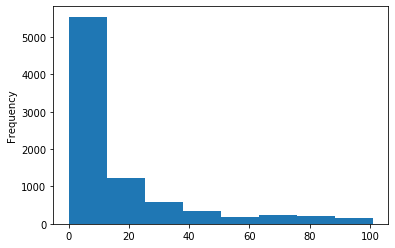

In [62]:
# I will plot the histogram of my new feature that is calorie count
df['Calorie_Count_per_givenwt'].plot(kind='hist',bins=8)

In [63]:
#As the above graph is positively skewed i will remove the skewness ny doing log transformation
df['log_Calorie']=np.sqrt(df['Calorie_Count_per_givenwt'])

In [64]:
# To check the value counts of all item type to know which items are bought daily and which are boght rarely 
b=df.groupby('Outlet_Identifier')['Item_Type'].value_counts()
b.head(30)

Outlet_Identifier  Item_Type            
OUT010             Fruits and Vegetables     79
                   Snack Foods               71
                   Household                 67
                   Frozen Foods              54
                   Dairy                     43
                   Baking Goods              42
                   Health and Hygiene        37
                   Canned                    35
                   Meat                      34
                   Soft Drinks               28
                   Breads                    17
                   Hard Drinks               16
                   Others                    10
                   Breakfast                  9
                   Starchy Foods              9
                   Seafood                    4
OUT013             Fruits and Vegetables    142
                   Snack Foods              125
                   Household                103
                   Frozen Foods              92

In [65]:
# Grouping item type into D(daily) and S(sometimes) according to daily need
dict={'Dairy':'D','Meat':'S','Fruits and Vegetables':'D','Breakfast':'S','Breads':'S','Starchy Foods':'S','Seafood':'S','Soft Drinks':'S','Household':'D','Baking Goods':'S','Snack Foods':'D','Frozen Foods':'D','Hard Drinks':'S','Canned':'D','Health and Hygiene':'S','Others':'S'}
df['Item_Frequency']=df['Item_Type'].map(dict)

In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,-4.132215,expensive,light,FD,21,0,46,4.2780,2.068333,D
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,-3.948780,cheap,vlight,DR,11,1,51,3.0192,1.737585,S
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,-4.088756,affordable,heavy,FD,21,0,143,25.0250,5.002499,S
3,FDX07,19.20,Regular,0.122911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,...,-2.096299,slightly expensive,heavy,FD,22,0,65,12.4800,3.532704,D
4,NCD19,8.93,No Fat,0.013217,Household,53.8614,OUT013,1987,High,Tier 3,...,-4.326277,cheap,light,NC,33,0,0,0.0000,0.000000,D


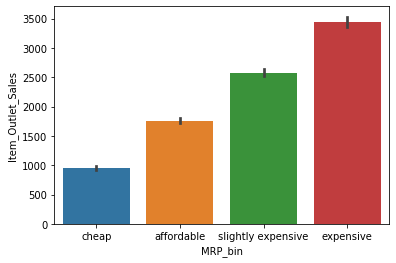

In [67]:
sns.barplot(df['MRP_bin'],df['Item_Outlet_Sales'])
plt.show()

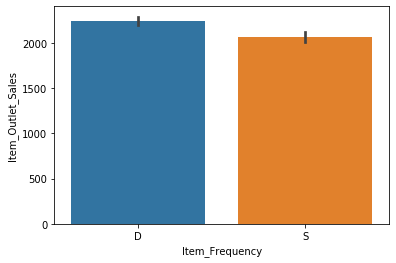

In [68]:
sns.barplot(df['Item_Frequency'],df['Item_Outlet_Sales'])
plt.show()

The above graph is quite clear since the graph shows that daily used products generally have higher outlet sales

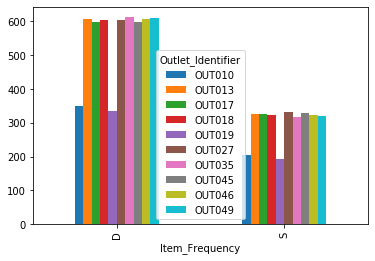

In [69]:
a=pd.crosstab(df['Item_Frequency'],df['Outlet_Identifier'])
a.plot(kind='bar')
plt.show()

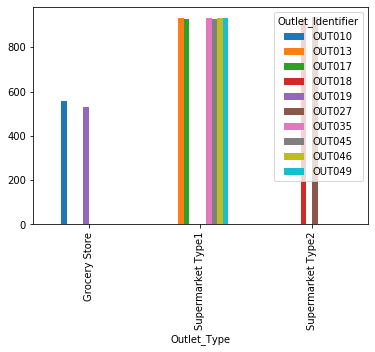

In [70]:
a=pd.crosstab(df['Outlet_Type'],df['Outlet_Identifier'])
a.plot(kind='bar')
plt.show()

First graph shows that OUT019 and OUT010 are two outles which have least sales of daily used products.

Second graph shows that both those outlets corresponds to outlet of type grocery store.

By combining the result of both graphs we can justify that why grocery store has least outlet Sales

So from above graphs we found another reason why grocery store has minimum sales. 

# Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Item_Identifier_temp']=le.fit_transform(df['Item_Identifier_temp'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Type1']=le.fit_transform(df['Outlet_Type1'])
dict={'Small':0,'Medium':1,'High':2}
df['Outlet_Size']=df['Outlet_Size'].map(dict)
dict1={'cheap':0,'affordable':1,'slightly expensive':2,'expensive':3}
df['MRP_bin']=df['MRP_bin'].map(dict1)
dict2={'vlight':0,'light':1,'moderate':2,'heavy':3}
df['Weight_bin']=df['Weight_bin'].map(dict2)
dict3={'Tier 3':0,'Tier 2':1,'Tier 1':2}
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map(dict3)
dict4={'No Fat':0,'Low Fat':1,'Regular':2}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(dict4)
dict5={35:0,33:1,23:2,22:3,21:4,18:5,16:6,13:7,11:8}
df['Outlet_Existence']=df['Outlet_Existence'].map(dict5)
dict6={'D':1,'S':0}
df['Item_Frequency']=df['Item_Frequency'].map(dict6)
dict7={1985:0,1987:1,1997:2,1998:3,1999:4,2002:5,2004:6,2007:7,2009:8}
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].map(dict7)

In [72]:
# Final Dataset ready for training the model
pd.set_option('display.max_columns',None)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
0,FDA15,9.30,1,0.016047,4,249.8092,9,4,1,2,1,3735.1380,1,-4.132215,3,1,1,4,0,46,4.2780,2.068333,1
1,DRC01,5.92,2,0.019278,14,48.2692,3,8,1,0,2,443.4228,1,-3.948780,0,0,0,8,1,51,3.0192,1.737585,0
2,FDN15,17.50,1,0.016760,10,141.6180,9,4,1,2,1,2097.2700,1,-4.088756,1,3,1,4,0,143,25.0250,5.002499,0
3,FDX07,19.20,2,0.122911,6,182.0950,0,3,0,0,0,732.3800,0,-2.096299,2,3,1,3,0,65,12.4800,3.532704,1
4,NCD19,8.93,0,0.013217,9,53.8614,1,1,2,0,1,994.7052,1,-4.326277,0,1,2,1,0,0,0.0000,0.000000,1


In [73]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875418,1.165083,0.070105,7.226681,140.992782,4.722281,3.790684,0.546404,0.887129,1.091517,2181.288914,0.872932,-2.920409,1.093864,3.790684,0.435645,132.757010,16.919672,3.299801,0.648715
std,4.645016,0.716317,0.048407,4.209990,62.275067,2.837201,2.730322,0.683084,0.812757,0.580790,1706.499616,0.333069,0.788455,0.522090,2.730322,0.495870,154.121863,21.968149,2.455950,0.477400
min,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000,0.000000,-5.633875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,1.000000,0.031509,4.000000,93.826500,2.000000,1.000000,0.000000,0.000000,1.000000,834.247400,1.000000,-3.457491,1.000000,1.000000,0.000000,46.000000,4.114700,2.028472,0.000000
50%,12.650000,1.000000,0.058182,6.000000,143.012800,5.000000,4.000000,0.000000,1.000000,1.000000,1794.331000,1.000000,-2.844186,1.000000,4.000000,0.000000,65.000000,8.701000,2.949746,1.000000
75%,16.850000,2.000000,0.099119,10.000000,185.643700,7.000000,6.000000,1.000000,2.000000,1.000000,3101.296400,1.000000,-2.311435,1.000000,6.000000,1.000000,143.000000,19.682500,4.436492,1.000000
max,21.350000,2.000000,0.279887,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,2.000000,13086.964800,1.000000,-1.113550,2.000000,8.000000,1.000000,475.000000,100.937500,10.046766,1.000000


In [74]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Type1', 'log_visibility',
       'MRP_bin', 'Weight_bin', 'Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status', 'Calorie_Count_per_100g', 'Calorie_Count_per_givenwt',
       'log_Calorie', 'Item_Frequency'],
      dtype='object')

# Feature Selection

In [75]:
y=df[['Item_Outlet_Sales']]
X=df[[ 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'log_visibility',
       'MRP_bin', 'Weight_bin', 'Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status', 'Calorie_Count_per_100g', 'Calorie_Count_per_givenwt',
       'log_Calorie', 'Item_Frequency']]
x=df[['MRP_bin','Weight_bin','Item_Fat_Content','Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Item_Identifier_temp', 'Outlet_Existence',
       'Outlet_Status']]

# Train Test Split

Using train test split to create training set and validation set

In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=31)

# Standard Scaling

Standardisation is a scaling technique where the values are centred around mean with a unit standard deviation and mean of attributed becomes zero.

Normalisation is good to use when we do not have gaussian distribution but generally normalization is used for models like knn and neural network.In general we use standadisation since it is not affected by outliers and it works better compared to normalisation.At the end of the day we use scaling technique which works better.

It is good practice to fit scaler on training data and then use it to transform testing data to avoid data leakage 

In [77]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']]=scaler.fit_transform(X_train[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']])
X_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']]=scaler.transform(X_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']])

C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User-1\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\User-1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [78]:
#Printing the list of inter correlated features
correlated_features=set()
corr_matrix=df.corr()
for i in range(len(corr_matrix.columns)):
    for j in range (i):
        if(abs(corr_matrix.iloc[i,j]))>0.8:
            correlated_features.add(corr_matrix.columns[i])
correlated_features

{'Calorie_Count_per_givenwt',
 'Outlet_Existence',
 'Outlet_Status',
 'log_Calorie',
 'log_visibility'}

## Filter Methods

Pearson’s Correlation: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:
fs2

LDA: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.

ANOVA: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

Chi-Square: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

#### Pearson Correlation method for feature selection    (Input and Output Variable - Continuous)

In [79]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
Item_Weight,1.000000,-0.048540,-0.021742,0.035710,0.025967,-0.007586,-0.012126,0.012445,-0.002973,-0.001610,0.013198,-0.006883,-0.017039,0.071585,-0.012126,-0.015249,-0.024217,0.253291,0.208629,0.062497
Item_Fat_Content,-0.048540,1.000000,0.083802,-0.196265,0.001396,0.005817,0.004950,0.001489,0.004396,0.005425,0.018407,0.006780,0.088778,-0.565429,0.004950,0.001998,0.317612,0.265730,0.493279,0.091020
Item_Visibility,-0.021742,0.083802,1.000000,-0.042580,-0.006752,-0.097698,-0.083226,-0.091946,0.029097,-0.207818,-0.128512,-0.285263,0.912509,-0.054255,-0.083226,-0.090385,0.025929,0.022168,0.044265,0.014542
Item_Type,0.035710,-0.196265,-0.042580,1.000000,0.032651,0.001656,0.006527,0.000218,-0.003084,0.002889,0.017048,0.003389,-0.052735,0.007456,0.006527,0.006370,0.362605,0.346393,0.195407,0.010549
Item_MRP,0.025967,0.001396,-0.006752,0.032651,1.000000,0.003319,0.004162,-0.000872,-0.000232,0.000905,0.567574,0.004277,-0.002017,0.032517,0.004162,0.004264,0.019927,0.033800,0.021185,0.081021
Outlet_Identifier,-0.007586,0.005817,-0.097698,0.001656,0.003319,1.000000,-0.030969,-0.260272,0.716176,0.118469,0.162325,0.372802,-0.081736,-0.009730,-0.030969,-0.067962,0.010384,0.003475,0.006721,0.007928
Outlet_Establishment_Year,-0.012126,0.004950,-0.083226,0.006527,0.004162,-0.030969,1.000000,-0.292265,-0.042005,0.207365,-0.025525,0.314888,-0.065640,-0.009018,1.000000,0.871586,0.003353,-0.001068,0.001663,0.004979
Outlet_Size,0.012445,0.001489,-0.091946,0.000218,-0.000872,-0.260272,-0.292265,1.000000,-0.480075,0.424975,0.162753,0.305206,-0.075274,0.001276,-0.292265,-0.381350,0.000887,0.004273,0.002987,0.004294
Outlet_Location_Type,-0.002973,0.004396,0.029097,-0.003084,-0.000232,0.716176,-0.042005,-0.480075,1.000000,-0.434520,-0.089367,-0.041284,0.021261,-0.007661,-0.042005,-0.148173,0.001319,-0.001918,0.000115,0.003648
Outlet_Type,-0.001610,0.005425,-0.207818,0.002889,0.000905,0.118469,0.207365,0.424975,-0.434520,1.000000,0.383163,0.717075,-0.167355,-0.001244,0.207365,0.239659,0.006277,0.005649,0.005998,0.007619


So only Item MRP have pearson correlation value >0.5

#### Anova test (Input Variable - Categorical Variable , Output - Continuous)

In [80]:
from sklearn.feature_selection import chi2,f_regression
sel=f_regression(x,y)
p=pd.Series(sel[1])
p.index=x.columns
p=p[p<0.05]
p

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MRP_bin                      0.000000e+00
Outlet_Identifier            2.070364e-51
Outlet_Establishment_Year    1.844583e-02
Outlet_Size                  1.122518e-51
Outlet_Location_Type         1.389024e-16
Outlet_Existence             1.844583e-02
Outlet_Status                3.965603e-03
dtype: float64

In [81]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
sel=SelectFromModel(LinearRegression())
sel.fit(X_train,y_train)
X_train.columns[sel.get_support()]

Index(['Item_MRP', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Status'], dtype='object')

### Wraper Methods

Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

Recursive Feature elimination: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

#### Multivariate Feature Selection

In [82]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
sfs=SFS( RandomForestRegressor(),
        k_features=5,
        forward= True,
        floating=False,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=2,
        cv=None
       
       ).fit(X_train,y_train)
sfs.k_feature_names_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    5.7s finished

[2020-06-26 06:35:24] Features: 1/5 -- score: -726346.5934226052[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.2s finished

[2020-06-26 06:35:27] Features: 2/5 -- score: -402777.1101661524[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    2.5s finished

[2020-06-26 06:35:29] Features: 3/5 -- score: -285496.74705537065[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    2.3s finished

[2020-06-26 06:35:32] Features: 4/5 -- score: -248155.3857844337[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished

[20

('Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Type',
 'log_Calorie')

In [83]:
X_train1=X_train.drop(['Calorie_Count_per_givenwt',
 'Outlet_Existence',
 'Outlet_Status',
 'log_Calorie',
 'log_visibility'],axis=1)

In [84]:
from sklearn.feature_selection import RFE
sel=RFE(RandomForestRegressor(random_state=0),n_features_to_select=5)
sel.fit(X_train1,y_train)
X_train1.columns[sel.get_support()]

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User-1\Anaconda3\lib\site-pac

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Type'],
      dtype='object')

# Training The Model

1 ) 'Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Status','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'

2 )  'Item_Weight','Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Outlet_Type'

3 )    'Item_Weight','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type'

4 )  'Item_MRP','Outlet_Size','Outlet_Type','Outlet_Location_Type','Outlet_Status'

5 )  'Item_MRP','Outlet_Size','Outlet_Type','Outlet_Location_Type','Outlet_Establishment_Year'

6 )   'Item_MRP','Item_Weight','Outlet_Type','log_Calorie','Outlet_Establishment_Year','log_visibility'

7 )    'Calorie_Count_per_givenwt','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type'

In [86]:
ya=y_train['Item_Outlet_Sales']
yb=y_test['Item_Outlet_Sales']
Xa=X_train[['Calorie_Count_per_givenwt','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]
Xb=X_test[[ 'Calorie_Count_per_givenwt','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
logreg=LinearRegression()
from sklearn.linear_model import Ridge
r=Ridge()
from sklearn.linear_model import Lasso
l=Lasso()
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor(random_state=0)
from sklearn.ensemble import RandomForestRegressor
log=RandomForestRegressor(random_state=5)
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(random_state=0,learning_rate=0.07,max_leaf_nodes=4)
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(GradientBoostingRegressor(random_state=0,learning_rate=0.07,max_leaf_nodes=4))

In [88]:
li2=['Linear','Ridge','Lasso','DecisionTree','RandomForest','Gradient','Bagging']

In [89]:
row=[]
for j in li2:
    if j=='Linear':
        logreg.fit(Xa,ya)
        final=logreg.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final))])
    elif j=='Ridge':
        r.fit(Xa,ya)
        final1=r.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final1))])
    elif j=='Lasso':
        l.fit(Xa,ya)
        final2=l.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final2))])
    elif j=='DecisionTree':
        dtc.fit(Xa,ya)
        final3=dtc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final3))])
    elif j=='RandomForest':
        log.fit(Xa,ya)
        final4=log.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final4))])
    elif j=='Gradient':
        gbc.fit(Xa,ya)
        final6=gbc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final6))])
    elif j=='Bagging':
        bc.fit(Xa,ya)
        final5=bc.predict(Xb)
        row.append([j,np.sqrt(metrics.mean_squared_error(yb,final5))])

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
row

[['Linear', 1200.587154871186],
 ['Ridge', 1200.581810483922],
 ['Lasso', 1200.5398660115502],
 ['DecisionTree', 1599.8344605442824],
 ['RandomForest', 1195.5846937294098],
 ['Gradient', 1066.3598211910946],
 ['Bagging', 1069.2747813839285]]

### Linear Regression

In [91]:
logreg=LinearRegression()
logreg.fit(Xa,ya)
pred=logreg.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred)))

1200.587154871186


In [92]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,Xa,ya,cv=10,scoring='neg_mean_squared_error')
score.mean()

-1525287.4185354705

### Ridge Regression

In [93]:
r=Ridge()
r.fit(Xa,ya)
pred0=r.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred0)))

1200.581810483922


### Lasso Regression

In [94]:
l=Lasso()
l.fit(Xa,ya)
pred1=l.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred1)))

1200.5398660115502


### Decision Tree Regressor

In [95]:
dtc.fit(Xa,ya)
pred2=dtc.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred2)))

1599.8344605442824


In [96]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,Xa,ya,cv=10,scoring='neg_mean_squared_error')
score.mean()

-2448067.64578878

### Random Forest Regressor

In [101]:
from sklearn.ensemble import RandomForestRegressor
log=RandomForestRegressor(random_state=0,max_features=4)
log.fit(Xa,ya)
pred3=log.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred3)))

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1185.2900317872932


In [102]:
max_features_range=np.arange(1,4,1)
n_estimators_range=np.arange(10,210,10)
param_grid = {'criterion':['mse','mae'] ,'max_features':max_features_range}
grid=GridSearchCV(log,param_grid,cv=None,scoring='neg_mean_squared_error',n_jobs=-1)
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


-0.32151184132003163
{'criterion': 'mae', 'max_features': 2}


### Gradient Boosting Regressor

We tried and tested 3 methods :

1 ) Testing different hyperparameters( individual ) inside GradientBoostingRegressor

2 ) Using GridSearchCv on hyperparameters that influence GradientBoostingRegressor, the most

3 ) Bagging with base estimator as GradientBoostingRegressor ,and eventually , trying different bagging hyperparameters on the same

Method 1

Below are the graphs for 6 different hyperparameters of GradientBoostingRegressor

1 ) Learning Rate

2 ) N Estimators

3 ) Max Depth

4 ) Min Samples Leaf

5 ) Min Samples Split

6 ) Max Feature

These graphs will basically help us to look at the training and testing error , at the same time , for each and every hyperparameter

Learning Rate : - Training vs Testing Error

In [102]:
from sklearn.ensemble import GradientBoostingRegressor
gbc=GradientBoostingRegressor(max_leaf_nodes=6,min_samples_leaf=5)
gbc.fit(Xa,ya)
pred4=gbc.predict(Xb)
pp=gbc.predict(Xa)
print(np.sqrt(metrics.mean_squared_error(yb,pred4)))
print(np.sqrt(metrics.mean_squared_error(ya,pp)))

1070.3108641628503
1042.9883295965956


##### Hyperparameter tuning by checking training and testing error


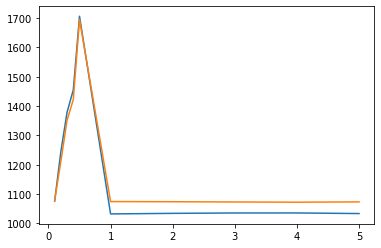

In [103]:
min_samples_leaf=[0.1,0.2,0.3,0.4,0.5,1,2,3,4,5]
train_result=[]
test_result=[]
for i in min_samples_leaf:
    gbc=GradientBoostingRegressor( random_state=0,min_samples_leaf=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error1=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error1)
    pre=gbc.predict(Xa)
    error2=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error2)
plt.plot(min_samples_leaf,train_result)
plt.plot(min_samples_leaf,test_result)
plt.show()

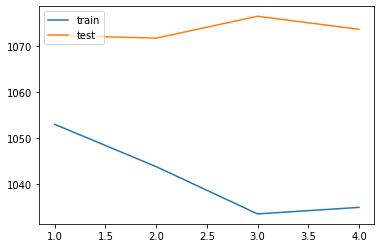

In [104]:
max_features=[1,2,3,4]
train_result=[]
test_result=[]
for i in max_features:
    gbc=GradientBoostingRegressor( random_state=0,max_features=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(max_features,train_result,label='train')
plt.plot(max_features,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

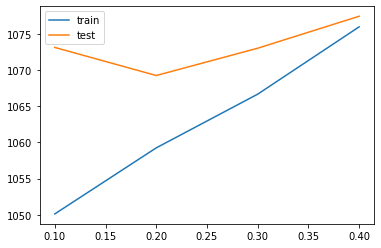

In [105]:
min_samples_split=[0.1,0.2,0.3,0.4]
train_result=[]
test_result=[]
for i in min_samples_split:
    gbc=GradientBoostingRegressor( random_state=0,min_samples_split=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(min_samples_split,train_result,label='train')
plt.plot(min_samples_split,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

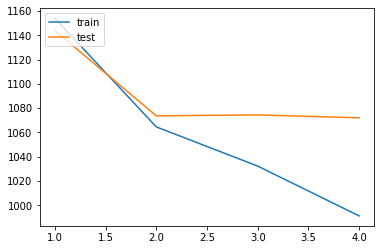

In [106]:
max_depth=[1,2,3,4]
train_result=[]
test_result=[]
for i in max_depth:
    gbc=GradientBoostingRegressor( random_state=0,max_depth=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(max_depth,train_result,label='train')
plt.plot(max_depth,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

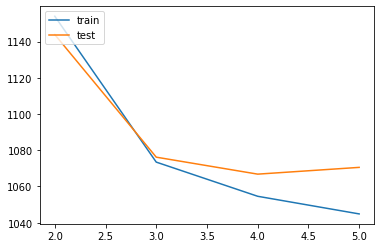

In [107]:
max_leaf_nodes=[2,3,4,5]
train_result=[]
test_result=[]
for i in max_leaf_nodes:
    gbc=GradientBoostingRegressor( random_state=0,max_leaf_nodes=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(max_leaf_nodes,train_result,label='train')
plt.plot(max_leaf_nodes,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

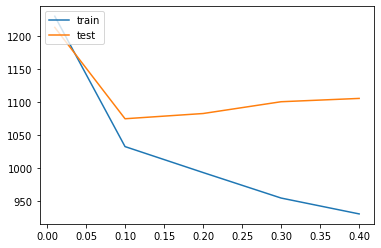

In [108]:
learning_rate=[0.01,0.1,0.2,0.3,0.4]
train_result=[]
test_result=[]
for i in learning_rate:
    gbc=GradientBoostingRegressor( random_state=0,learning_rate=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(learning_rate,train_result,label='train')
plt.plot(learning_rate,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

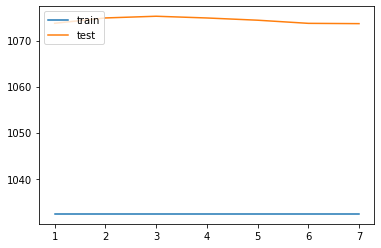

In [109]:
random_state=[1,2,3,4,5,6,7]
train_result=[]
test_result=[]
for i in random_state:
    gbc=GradientBoostingRegressor(random_state=i)
    gbc.fit(Xa,ya)
    pred4=gbc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=gbc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(random_state,train_result,label='train')
plt.plot(random_state,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

max Depth =3

min sample split =0.2

Max Features=4

Min Sample leaf=0.1

Max leaf nodes=4

learning rate= 0.07

##### Hyperparameter tuning using GridSearchCV

In [110]:
max_features_range=np.arange(1,6,1)
min_sample_range=[0.1,0.2,0.3,1,2,3,4,5]
param_grid = {'max_features':max_features_range,'min_samples_leaf':min_sample_range,'max_leaf_nodes':[2,3,4,5,6],'min_samples_split':[0.1,0.2,0.3,0.4]}
grid=GridSearchCV(gbc,param_grid,cv=None,scoring='neg_mean_squared_error',n_jobs=-1)
grid.fit(Xa,ya)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\User-1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


-1164369.2606655308
{'max_features': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 4, 'min_samples_split': 0.1}


### Ada Boost Regressor

In [111]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor(random_state=0,n_estimators=10,learning_rate=0.1)
abc.fit(Xa,ya)
pred5=abc.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred5)))

1150.2849445906922


### Bagging Regressor

In [112]:
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(GradientBoostingRegressor(random_state=0),random_state=4,n_estimators=5)
bc.fit(Xa,ya)
pred6=bc.predict(Xb)
ppp=bc.predict(Xa)
print(np.sqrt(metrics.mean_squared_error(yb,pred6)))
print(np.sqrt(metrics.mean_squared_error(ya,ppp)))

1069.5597768673874
1036.4570073337825


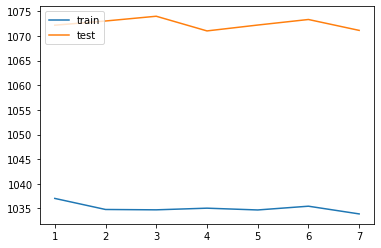

In [113]:
random_state=[1,2,3,4,5,6,7]
train_result=[]
test_result=[]
for i in random_state:
    bc=BaggingRegressor(GradientBoostingRegressor(random_state=0),random_state=i)
    bc.fit(Xa,ya)
    pred4=bc.predict(Xb)
    error3=np.sqrt(metrics.mean_squared_error(yb,pred4))
    test_result.append(error3)
    pre=bc.predict(Xa)
    error4=np.sqrt(metrics.mean_squared_error(ya,pre))
    train_result.append(error4)
plt.plot(random_state,train_result,label='train')
plt.plot(random_state,test_result,label='test')
plt.legend(loc='upper left')
plt.show()

### Stacking Regressor

In [100]:
from mlxtend.regressor import StackingRegressor
scc=StackingRegressor(regressors=[gbc],meta_regressor=bc)
scc.fit(Xa,ya)
pred7=scc.predict(Xb)
print(np.sqrt(metrics.mean_squared_error(yb,pred7)))

1093.9470183380326


# Preparing testing dataset for final submission

We shall now deal with testing file, in the same manner as we dealt with our training file . Except , for the fact that we wont remove Outliers , from our testing file ; in order to maintain the integrity of the data .

You might skip the next few cells , until the title 'Finally!!!'

#### Filling the missing value

In [91]:
df_test['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df_test['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df_test['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [92]:
df_test['Item_Visibility'].replace(0,np.nan,inplace=True)

In [93]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility               353
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [94]:
df_test['Outlet_Size'].fillna('Small',inplace=True)

In [95]:
df_test['Outlet_Type1']=df_test['Outlet_Type']
dict={'Supermarket Type1':'Supermarket','Supermarket Type2':'Supermarket','Supermarket Type3':'Supermarket','Grocery Store':'Grocery Store'}
df_test['Outlet_Type1']=df_test['Outlet_Type1'].map(dict)
df_test.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Outlet_Type1                   0
dtype: int64

In [96]:
df0=df_test[df_test['Item_Identifier']=='FDU28']
df0

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1
827,FDU28,19.2,Regular,NaN,Frozen Foods,189.6214,OUT035,2004,Small,Tier 2,Supermarket Type1,Supermarket
1461,FDU28,19.2,Regular,0.094064,Frozen Foods,187.0214,OUT049,1999,Medium,Tier 1,Supermarket Type1,Supermarket
2109,FDU28,19.2,Regular,0.094109,Frozen Foods,188.1214,OUT045,2002,Small,Tier 2,Supermarket Type1,Supermarket
3205,FDU28,19.2,Regular,0.157200,Frozen Foods,189.3214,OUT010,1998,Small,Tier 3,Grocery Store,Grocery Store
4771,FDU28,19.2,Regular,0.093840,Frozen Foods,188.0214,OUT013,1987,High,Tier 3,Supermarket Type1,Supermarket


In [97]:
df_test['Item_Visibility'].fillna(df_test.groupby(['Item_Identifier','Outlet_Type1'])['Item_Visibility'].transform('mean'),inplace=True)

In [98]:
df_test['Item_Visibility']=(df_test.groupby('Item_Identifier')['Item_Visibility'].transform(lambda x:x.fillna(x.mean()+0.1)))

In [99]:
a=df_test[df_test['Outlet_Type1']=='Supermarket']
m=a['Item_Visibility'].mean()
print(m)
b=df_test[df_test['Outlet_Type1']=='Grocery Store']
m1=b['Item_Visibility'].mean()
print(m1)

0.06416203204468011
0.11417913043057272


In [100]:
dict={'Supermarket':0.06416203204468011,'Grocery Store':0.11417913043057272}
df_test['Item_Visibility'].fillna(df_test['Outlet_Type1'].map(dict),inplace=True)

In [101]:
df_test['Item_Weight'].fillna(df_test.groupby('Item_Identifier')['Item_Weight'].transform('median'),inplace=True)
df_test['Item_Weight'].fillna(df_test.groupby('Item_Type')['Item_Weight'].transform('mean'),inplace=True)

In [102]:
df_test.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Type1                 0
dtype: int64

In [103]:
df_test['log_visibility']=np.log(df_test['Item_Visibility'])

#### Feature Engineering

In [104]:
df_test['MRP_bin']=pd.cut(df_test['Item_MRP'],bins=[31,94.413,141.4155,186.0267,267],labels=['cheap','affordable','slightly expensive','expensive'])
df_test['Weight_bin']=pd.cut(df_test['Item_Weight'],bins=[4,8.64,12.36,16.71,22],labels=['vlight','light','moderate','heavy'])


In [105]:
df_test['Item_Identifier_temp']=df_test['Item_Identifier'].str[:2]
dict={'Supermarket Type1':'Supermarket Type1','Supermarket Type2':'Supermarket Type2','Supermarket Type3':'Supermarket Type2','Grocery Store':'Grocery Store'}
df_test['Outlet_Type']=df_test['Outlet_Type'].map(dict)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Supermarket,-4.884245,affordable,heavy,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,Supermarket,-3.258977,cheap,vlight,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,Grocery Store,-2.306845,expensive,moderate,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,Supermarket,-4.174142,slightly expensive,vlight,FD
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type2,Supermarket,-2.132005,expensive,moderate,FD


In [106]:
df_test['Outlet_Existence']=[2020-i for i in df_test['Outlet_Establishment_Year']]
df_test['Outlet_Status']=[0 if i<=2000 else 1 for i in df_test['Outlet_Establishment_Year']]
df_test.loc[df_test['Item_Identifier_temp']=='NC','Item_Fat_Content']='No Fat'

In [107]:
# Craeted a new column named calorie count which will show the calorie of corresponding item type
def set_cal(df_test):
    if df_test['Item_Type']=='Dairy':
        return 46
    elif df_test['Item_Type']=='Soft Drinks':
        return 51
    elif df_test['Item_Type']=='Meat':
        return 143
    elif df_test['Item_Type']=='Fruits and Vegetables':
        return 65
    elif df_test['Item_Type']=='Baking Goods':
        return 140
    elif df_test['Item_Type']=='Snack Foods':
        return 475
    elif df_test['Item_Type']=='Frozen Foods':
        return 50
    elif df_test['Item_Type']=='Breakfast':
        return 350
    elif df_test['Item_Type']=='Hard Drinks':
        return 250
    elif df_test['Item_Type']=='Canned':
        return 80
    elif df_test['Item_Type']=='Starchy Foods':
        return 90
    elif df_test['Item_Type']=='Seafood':
        return 204
    elif df_test['Item_Type']=='Breads':
        return 250
    else:
        return 0
df_test['Calorie_Count_per_100g']=df_test.apply(set_cal,axis=1)
df_test['Calorie_Count_per_givenwt']=df_test['Calorie_Count_per_100g']/100
df_test['Calorie_Count_per_givenwt']=df_test['Calorie_Count_per_givenwt']*df_test['Item_Weight']
df_test['log_Calorie']=np.sqrt(df_test['Calorie_Count_per_givenwt'])

In [108]:
dict={'Dairy':'D','Meat':'S','Fruits and Vegetables':'D','Breakfast':'S','Breads':'S','Starchy Foods':'S','Seafood':'S','Soft Drinks':'S','Household':'D','Baking Goods':'S','Snack Foods':'D','Frozen Foods':'D','Hard Drinks':'S','Canned':'D','Health and Hygiene':'S','Others':'S'}
df_test['Item_Frequency']=df_test['Item_Type'].map(dict)

#### Label Encoding

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_test['Item_Identifier_temp']=le.fit_transform(df_test['Item_Identifier_temp'])
df_test['Item_Type']=le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Type']=le.fit_transform(df_test['Outlet_Type'])
df_test['Outlet_Identifier']=le.fit_transform(df_test['Outlet_Identifier'])
df_test['Outlet_Type1']=le.fit_transform(df_test['Outlet_Type1'])
dict={'Small':0,'Medium':1,'High':2}
df_test['Outlet_Size']=df_test['Outlet_Size'].map(dict)
dict1={'cheap':0,'affordable':1,'slightly expensive':2,'expensive':3}
df_test['MRP_bin']=df_test['MRP_bin'].map(dict1)
dict2={'vlight':0,'light':1,'moderate':2,'heavy':3}
df_test['Weight_bin']=df_test['Weight_bin'].map(dict2)
dict3={'Tier 3':0,'Tier 2':1,'Tier 1':2}
df_test['Outlet_Location_Type']=df_test['Outlet_Location_Type'].map(dict3)
dict4={'No Fat':0,'Low Fat':1,'Regular':2}
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].map(dict4)
dict5={35:0,33:1,23:2,22:3,21:4,18:5,16:6,13:7,11:8}
df_test['Outlet_Existence']=df_test['Outlet_Existence'].map(dict5)
dict6={'D':1,'S':0}
df_test['Item_Frequency']=df_test['Item_Frequency'].map(dict6)
dict7={1985:0,1987:1,1997:2,1998:3,1999:4,2002:5,2004:6,2007:7,2009:8}
df_test['Outlet_Establishment_Year']=df_test['Outlet_Establishment_Year'].map(dict7)

In [110]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
0,FDW58,20.750,1,0.007565,13,107.8622,9,4,1,2,1,1,-4.884245,1,3,1,4,0,475,98.56250,9.927865,1
1,FDW14,8.300,2,0.038428,4,87.3198,2,7,0,1,1,1,-3.258977,0,0,1,7,1,46,3.81800,1.953970,1
2,NCN55,14.600,0,0.099575,11,241.7538,0,3,0,0,0,0,-2.306845,3,2,2,3,0,0,0.00000,0.000000,0
3,FDQ58,7.315,1,0.015388,13,155.0340,2,7,0,1,1,1,-4.174142,2,0,1,7,1,475,34.74625,5.894595,1
4,FDY38,13.600,2,0.118599,4,234.2300,5,0,1,0,2,1,-2.132005,3,2,1,0,0,46,6.25600,2.501200,1


In [111]:
df_test.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.00000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.675875,1.162999,0.070519,7.233410,141.023273,4.722760,3.78965,0.546383,0.887168,1.091533,0.872910,-2.924142,1.100158,3.78965,0.435487,132.140116,16.585658,3.261425,0.645485
std,4.649403,0.720556,0.050641,4.219057,61.809091,2.837201,2.73036,0.683048,0.812824,0.580857,0.333103,0.784898,0.522051,2.73036,0.495864,153.515056,21.564775,2.439224,0.478408
min,4.555000,0.000000,0.003591,0.000000,31.990000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-5.629209,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630000,1.000000,0.031333,4.000000,94.412000,2.000000,1.00000,0.000000,0.000000,1.000000,1.000000,-3.463095,1.000000,1.00000,0.000000,46.000000,3.983100,1.995771,0.000000
50%,12.350000,1.000000,0.058132,6.000000,141.415400,5.000000,4.00000,0.000000,1.000000,1.000000,1.000000,-2.845035,1.000000,4.00000,0.000000,65.000000,8.441000,2.905340,1.000000
75%,16.700000,2.000000,0.097464,10.000000,186.026600,7.000000,6.00000,1.000000,2.000000,1.000000,1.000000,-2.328268,1.000000,6.00000,1.000000,143.000000,19.090500,4.369268,1.000000
max,21.350000,2.000000,0.410377,15.000000,266.588400,9.000000,8.00000,2.000000,2.000000,2.000000,1.000000,-0.890679,2.000000,8.00000,1.000000,475.000000,100.937500,10.046766,1.000000


#### Making the final prediction

In [112]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']]=scaler.fit_transform(df_test[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']])
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
0,FDW58,1.736747,1,-1.243241,13,-0.536555,9,4,1,2,1,1,-2.497489,1,3,1,4,0,475,3.801758,2.733257,1
1,FDW14,-0.941252,2,-0.633748,4,-0.868937,2,7,0,1,1,1,-0.426634,0,0,1,7,1,46,-0.592113,-0.536060,1
2,NCN55,0.413880,0,0.573814,11,1.629848,0,3,0,0,0,0,0.786537,3,2,2,3,0,0,-0.769176,-1.337192,0
3,FDQ58,-1.153126,1,-1.088738,13,0.226697,2,7,0,1,1,1,-1.592703,2,0,1,7,1,475,0.842216,1.079606,1
4,FDY38,0.198780,2,0.949517,4,1.508110,5,0,1,0,2,1,1.009312,3,2,1,0,0,46,-0.479048,-0.311694,1


In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']]=scaler.fit_transform(df[['Item_Weight','Item_MRP','Item_Visibility','log_visibility','Calorie_Count_per_givenwt','log_Calorie']])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Type1,log_visibility,MRP_bin,Weight_bin,Item_Identifier_temp,Outlet_Existence,Outlet_Status,Calorie_Count_per_100g,Calorie_Count_per_givenwt,log_Calorie,Item_Frequency
0,FDA15,-0.769777,1,-1.116779,4,1.747454,9,4,1,2,1,3735.1380,1,-1.537026,3,1,1,4,0,46,-0.575488,-0.501452,1
1,DRC01,-1.497482,2,-1.050031,14,-1.489023,3,8,1,0,2,443.4228,1,-1.304361,0,0,0,8,1,51,-0.632793,-0.636132,0
2,FDN15,0.995659,1,-1.102054,10,0.010040,9,4,1,2,1,2097.2700,1,-1.481904,1,3,1,4,0,143,0.368980,0.693336,0
3,FDX07,1.361665,2,1.090929,6,0.660050,0,3,0,0,0,732.3800,0,1.045283,2,3,1,3,0,65,-0.202108,0.094838,1
4,NCD19,-0.849437,0,-1.175258,9,-1.399220,1,1,2,0,1,994.7052,1,-1.783170,0,1,2,1,0,0,-0.770236,-1.343673,1


In [229]:
X1=df[[ 'Calorie_Count_per_givenwt','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]
y1=df['Item_Outlet_Sales']

In [230]:
XX=df_test[[ 'Calorie_Count_per_givenwt','Item_Visibility', 'Item_MRP','Outlet_Existence','Outlet_Type']]

# Finally this is our best model and best set of hyperparameters

In [231]:
 from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor(GradientBoostingRegressor(random_state=7),random_state=4,n_estimators=5)
bc.fit(X1,y1)
predd=bc.predict(XX)
predd=np.where(predd>0,predd,100)
predd=pd.DataFrame(predd,columns=['Item_Outlet_Sales'])

In [233]:
predd.to_csv('C:\\Users\\User-1\\Desktop\\final2.csv')

In this competition we have current rank of 121